# ***``Principal Component Analysis (PCA)``***

---

#### 1. [Understanding PCA using dummy dataset](#Understanding_PCA)
- [Data Standardization](#STEP-1)
- [COV Symmetric Matrix](#STEP-2)

#### 2. [Ways of calculating Eigen Values & Vectors](#Calculating_Eigen_values_and_vectors)
- [Using Numpy Linear Alzebra](#1._Numpy_Linear_Alzebra)
- [Using Scipy Linear Alzebra](#2._Scipy_Linear_Alzebra)
- [Using Sklearn PCA](#3._Sklearn_PCA)
- [Using Scipy SVD](#4._Scipy_SVD)
    
#### 3. [PCA on Iris Dataset](#PCA_on_IRIS_Dataset)

#### 4. [Ways of generating Symmetric_Matrix](#Ways_of_generating_Symmetric_Matrix)

#### 5. [Which technique (SS, MMS, L2 or L1 norm) is better before applying PCA?](#Which_technique_is_better_before_applying_PCA?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler as SS
from numpy.linalg import eigh
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score as acc_scr, precision_score as pre_scr, recall_score as rec_scr

## ***`Understanding_PCA`***
#### **Using dummy dataset**

In [2]:
toy_df = pd.DataFrame({'col1':[9,0,4,5,6,7],
                       'col2':[6,8,9,3,2,5],
                       'col3':[2,3,8,3,7,0],
                       'col4':[1,7,8,4,5,8]})
toy_df

,col1,col2,col3,col4
0,9,6,2,1
1,0,8,3,7
2,4,9,8,8
3,5,3,3,4
4,6,2,7,5
5,7,5,0,8


### ***STEP-1***
- **`Standardizing the dataset`**

In [3]:
ss = SS()

In [4]:
toy_df_nrm = pd.DataFrame(ss.fit_transform(toy_df),columns=toy_df.columns)
toy_df_nrm

,col1,col2,col3,col4
0,1.372065,0.2,-0.656205,-1.8
1,-1.849305,1.0,-0.298275,0.6
2,-0.417585,1.4,1.491375,1.0
3,-0.059655,-1.0,-0.298275,-0.6
4,0.298275,-1.4,1.133445,-0.2
5,0.656205,-0.2,-1.372065,1.0


In [5]:
## How Standard Scaler works?
#### Below I have mentioned the manual way of standard scaler for 'col2' of the dummy set
(toy_df['col2'] - toy_df['col2'].mean())/np.std(toy_df['col2'])

0    0.2
1    1.0
2    1.4
3   -1.0
4   -1.4
5   -0.2
Name: col2, dtype: float64

### ***STEP-2***
- **`Finding the Co-variance matrix of Standardized dataset`**
    - **Un-biased Symmetric matrix**

In [6]:
toy_df_nrm_cov = pd.DataFrame(np.cov(toy_df_nrm,rowvar=False,bias=False))
toy_df_nrm_cov

,0,1,2,3
0,1.200000,-0.529736,-0.303203,-0.672908
1,-0.529736,1.200000,0.128855,0.464000
2,-0.303203,0.128855,1.200000,0.214758
3,-0.672908,0.464000,0.214758,1.200000


In [7]:
unbias_ddof = 1
toy_df_nrm_rows = toy_df_nrm.shape[0]

toy_df_nrm_cov2 = (1/(toy_df_nrm_rows - unbias_ddof)) * (toy_df_nrm.T @ toy_df_nrm)
toy_df_nrm_cov2

,col1,col2,col3,col4
col1,1.200000,-0.529736,-0.303203,-0.672908
col2,-0.529736,1.200000,0.128855,0.464000
col3,-0.303203,0.128855,1.200000,0.214758
col4,-0.672908,0.464000,0.214758,1.200000


#### **Just for understanding purpose calculating the biased COV Symmetric Matrix**
- #### **Biased Symmetric matrix**

In [8]:
toy_df_nrm_bias_cov = pd.DataFrame(np.cov(toy_df_nrm,rowvar=False,bias=True))
toy_df_nrm_bias_cov

,0,1,2,3
0,1.000000,-0.441447,-0.252669,-0.560757
1,-0.441447,1.000000,0.107379,0.386667
2,-0.252669,0.107379,1.000000,0.178965
3,-0.560757,0.386667,0.178965,1.000000


In [9]:
bias_ddof = 0
toy_df_nrm_rows = toy_df_nrm.shape[0]

toy_df_nrm_bias_cov = (1/(toy_df_nrm_rows - bias_ddof)) * (toy_df_nrm.T @ toy_df_nrm)
toy_df_nrm_bias_cov

,col1,col2,col3,col4
col1,1.000000,-0.441447,-0.252669,-0.560757
col2,-0.441447,1.000000,0.107379,0.386667
col3,-0.252669,0.107379,1.000000,0.178965
col4,-0.560757,0.386667,0.178965,1.000000


## **`Calculating_Eigen_values_and_vectors`**

### **There are different ways of Calculating EIGEN values and vectors:**

### **1._Numpy_Linear_Alzebra**

- **The eigenvalues/eigenvectors are computed using LAPACK routines ``_syevd``, ``_heevd``.**

- **The eigenvalues of real symmetric or complex Hermitian matrices are always real. [1]_ The array `v` of (column) eigenvectors is unitary and `a`, `w`, and `v` satisfy the equations ``dot(a, v[:, i]) = w[i] * v[:, i]``.**

In [10]:
from numpy.linalg import eigh as n_eigh

In [11]:
n_values, n_vectors = n_eigh(toy_df_nrm_cov,UPLO='L')  
# UPLO means whether to follow the upper or lower triangular matrix of the covariance matrix

In [12]:
n_values                      ## Eigen Values

array([0.51170888, 0.74883547, 1.10629583, 2.43315982])

In [13]:
n_vectors                     ## Eigen Vectors

array([[ 0.76945532, -0.23550824,  0.04000138, -0.59234641],
       [ 0.16102751, -0.78110535, -0.3425419 ,  0.49659805],
       [ 0.11960917, -0.19442707,  0.92772635,  0.29532285],
       [ 0.60638461,  0.54461768, -0.14278922,  0.56151627]])

In [14]:
## Manual PC's calculation
toy_df_nrm @ n_vectors.T

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


### **2._Scipy_Linear_Alzebra**

- **This function uses LAPACK drivers for computations in all possible keyword combinations, prefixed with ``sy`` if arrays are real and ``he`` if complex, e.g., a float array with "evr" driver is solved via "syevr", complex arrays with "gvx" driver problem is solved via "hegvx" etc.**

- **As a brief summary, the slowest and the most robust driver is the classical ``<sy/he>ev`` which uses symmetric QR. ``<sy/he>evr`` is seen as the optimal choice for the most general cases. However, there are certain occassions that ``<sy/he>evd`` computes faster at the expense of more memory usage. ``<sy/he>evx``, while still being faster than ``<sy/he>ev``, often performs worse than the rest except when very few eigenvalues are requested for large arrays though there is still no performance guarantee.**

In [15]:
from scipy.linalg import eigh as s_eigh
s_values, s_vectors = s_eigh(toy_df_nrm_cov,lower=True,driver='evd')

In [16]:
s_values                      ## Eigen Values

array([0.51170888, 0.74883547, 1.10629583, 2.43315982])

In [17]:
s_vectors                      ## Eigen Vectors

array([[ 0.76945532, -0.23550824,  0.04000138, -0.59234641],
       [ 0.16102751, -0.78110535, -0.3425419 ,  0.49659805],
       [ 0.11960917, -0.19442707,  0.92772635,  0.29532285],
       [ 0.60638461,  0.54461768, -0.14278922,  0.56151627]])

In [18]:
# PC's from Scipy eig vectors
### Same as Numpy eig vectors
toy_df_nrm @ s_vectors.T

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


### ***Both NUMPY and SCIPY uses the LAPACK package for calculating the Eigen Values and Eigen Vectors.***

#### ***Lets first get some details about LAPACK:***

- ***LAPACK was designed as the successor to the linear equations and linear least-squares routines of LINPACK and the eigenvalue routines of EISPACK. (source - wikipedia).***

- ***Other packages like ARPACK(ARNoldi Package) and LOBPCG(Locally Optimal Block Preconditioned Conjugate Gradient) are also available in their Python, R and MATLAB implementation for calculating the Eigen Values/Vectors.***


#### ***Now, below is the difference between NUMPY and SCIPY EIGH implementation:***

- ***NUMPY supports only two versions or drivers or routines of LAPACK which are ``syevd`` and ``heevd``. Here, `sy` refers to real valued data and `he` refers to complex data.***
- ***On the other hand, SCIPY supports multiple routines of same package. So, in the above code I have used the driver as "`evd`" because same is also used by NUMPY. That is the reason I have got the same EIGEN values/vectors. Other supported values of driver are "`ev`", "`evr`", "`evx`"(their description in above cell).***

### **3._Sklearn_PCA**

### ***`Let's work with PCA`***

In [19]:
pca1 = PCA(svd_solver='full',whiten=False)

In [20]:
toy_df_pca_transf = pd.DataFrame(pca1.fit_transform(toy_df_nrm),columns=['PC1','PC2','PC3','PC4'])
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


In [21]:
np.round(toy_df_pca_transf.corr(),4)

,PC1,PC2,PC3,PC4
PC1,1.0,0.0,0.0,0.0
PC2,0.0,1.0,0.0,-0.0
PC3,0.0,0.0,1.0,0.0
PC4,0.0,-0.0,0.0,1.0


In [22]:
pca1.explained_variance_

array([2.43315982, 1.10629583, 0.74883547, 0.51170888])

In [23]:
# Variance of Principal Components
np.var(toy_df_pca_transf,ddof=1)

PC1    2.433160
PC2    1.106296
PC3    0.748835
PC4    0.511709
dtype: float64

In [24]:
pca1.explained_variance_ratio_

array([0.5069083 , 0.2304783 , 0.15600739, 0.10660602])

In [25]:
# Percentage of variations explained by PC's
np.var(toy_df_pca_transf,ddof=1)/np.sum(np.var(toy_df_nrm,ddof=1))

PC1    0.506908
PC2    0.230478
PC3    0.156007
PC4    0.106606
dtype: float64

In [26]:
pca1_values = pca1.singular_values_          ## PCA generated Eigen Values
pca1_values

array([3.48795056, 2.35190968, 1.93498769, 1.59954506])

In [27]:
pca1_vectors = pca1.components_              ## PCA generated Eigen Vectors
pca1_vectors

array([[-0.59234641,  0.49659805,  0.29532285,  0.56151627],
       [ 0.04000138, -0.3425419 ,  0.92772635, -0.14278922],
       [ 0.23550824,  0.78110535,  0.19442707, -0.54461768],
       [-0.76945532, -0.16102751, -0.11960917, -0.60638461]])

### **Now, lets try to generate Principal Components manually. Below is the matrix multiplication of DF and PCA Eigen Vectors:**

In [28]:
toy_df_nrm @ pca1_vectors.T

,0,1,2,3
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


In [29]:
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


### **So, we are good here because the dot product of Standardized data and PCA generated Eigen vectors gives us the exact Principal Components.**

## ***`Generate components from NUMPY and SCIPY Eigen vectors`***

- ***The confusion with the NUMPY and SCIPY implementations is that when we perform the dot product of Standardized matrix with their Eigen Vectors then different Principal Components are generated as compared to PCA.(refer below cell)***

In [30]:
n_pcs = toy_df_nrm @ n_vectors.T
s_pcs = toy_df_nrm @ s_vectors.T

In [31]:
# Numpy PC's
n_pcs

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


In [32]:
# Scipy PC's
s_pcs

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


In [33]:
# PCA PC's
toy_df_nrm @ pca1_vectors.T

,0,1,2,3
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


### ***Numpy and Scipy PC's are same because we have used same routine of LAPACK package.***

### ***But, we have the completely different Principal Components as compared to PCA generated components. The reason for that is PCA uses Linear Decomposition SVD algorithm.(For complete guide on SVD refer the other jupyter notebook)***

### **4._Scipy_SVD**

In [34]:
from scipy.linalg import svd

In [35]:
u,s,vt = svd(a=toy_df_nrm,lapack_driver='gesvd')

In [36]:
pd.DataFrame(u)

,0,1,2,3,4,5
0,-0.549876,-0.155355,0.688419,-0.051285,0.365159,0.252210
1,0.527774,-0.331181,-0.020251,-0.583776,0.490552,0.172999
2,0.557504,0.316567,0.382715,0.430680,-0.036097,0.505684
3,-0.254092,0.063400,-0.272031,-0.379131,-0.407258,0.740147
4,-0.186210,0.668212,-0.358661,0.011481,0.617616,0.092732
5,-0.095101,-0.561643,-0.420191,0.572030,0.278220,0.307129


In [37]:
svd_cmps = toy_df_nrm @ vt.T
svd_cmps

,0,1,2,3
0,-1.917940,-0.365382,1.332081,-0.082032
1,1.840850,-0.778908,-0.039185,-0.933776
2,1.944546,0.744536,0.740549,0.688892
3,-0.886259,0.149112,-0.526377,-0.606437
4,-0.649490,1.571575,-0.694005,0.018364
5,-0.331706,-1.320933,-0.813064,0.914988


In [38]:
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


### **So, we are good as all the doubts are solved!!**

### ***`Reconstructing the matrix from components`***
- ***With PCA it is easy to reconstruct the matrix just by using the inverse_transform function.***

In [39]:
pca1.inverse_transform(toy_df_pca_transf)

array([[ 1.37206497,  0.2       , -0.65620498, -1.8       ],
       [-1.84930496,  1.        , -0.29827499,  0.6       ],
       [-0.41758499,  1.4       ,  1.49137497,  1.        ],
       [-0.059655  , -1.        , -0.29827499, -0.6       ],
       [ 0.29827499, -1.4       ,  1.13344497, -0.2       ],
       [ 0.65620498, -0.2       , -1.37206497,  1.        ]])

### **Pretty simple!!**

- #### ***How we can reconstruct the matrix via SVD approach?***

In [40]:
sigma = np.zeros((toy_df_nrm.shape[0],toy_df_nrm.shape[1]))
sigma[0:toy_df_nrm.shape[1],0:toy_df_nrm.shape[1]] = np.diag(s)
sigma

array([[3.48795056, 0.        , 0.        , 0.        ],
       [0.        , 2.35190968, 0.        , 0.        ],
       [0.        , 0.        , 1.93498769, 0.        ],
       [0.        , 0.        , 0.        , 1.59954506],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [41]:
u @ sigma @ vt

array([[ 1.37206497,  0.2       , -0.65620498, -1.8       ],
       [-1.84930496,  1.        , -0.29827499,  0.6       ],
       [-0.41758499,  1.4       ,  1.49137497,  1.        ],
       [-0.059655  , -1.        , -0.29827499, -0.6       ],
       [ 0.29827499, -1.4       ,  1.13344497, -0.2       ],
       [ 0.65620498, -0.2       , -1.37206497,  1.        ]])

In [42]:
toy_df_nrm

,col1,col2,col3,col4
0,1.372065,0.2,-0.656205,-1.8
1,-1.849305,1.0,-0.298275,0.6
2,-0.417585,1.4,1.491375,1.0
3,-0.059655,-1.0,-0.298275,-0.6
4,0.298275,-1.4,1.133445,-0.2
5,0.656205,-0.2,-1.372065,1.0


### **Pretty simple here as well!!**

### ***`What are Principal Components in terms of SVD?`***

In [43]:
pca1.components_             ## Eigen Vectors

array([[-0.59234641,  0.49659805,  0.29532285,  0.56151627],
       [ 0.04000138, -0.3425419 ,  0.92772635, -0.14278922],
       [ 0.23550824,  0.78110535,  0.19442707, -0.54461768],
       [-0.76945532, -0.16102751, -0.11960917, -0.60638461]])

In [44]:
pca1.singular_values_        ## Eigen Values

array([3.48795056, 2.35190968, 1.93498769, 1.59954506])

In [45]:
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


In [46]:
pd.DataFrame(u @ sigma)

,0,1,2,3
0,-1.917940,-0.365382,1.332081,-0.082032
1,1.840850,-0.778908,-0.039185,-0.933776
2,1.944546,0.744536,0.740549,0.688892
3,-0.886259,0.149112,-0.526377,-0.606437
4,-0.649490,1.571575,-0.694005,0.018364
5,-0.331706,-1.320933,-0.813064,0.914988


In [47]:
toy_df_nrm @ vt.T

,0,1,2,3
0,-1.917940,-0.365382,1.332081,-0.082032
1,1.840850,-0.778908,-0.039185,-0.933776
2,1.944546,0.744536,0.740549,0.688892
3,-0.886259,0.149112,-0.526377,-0.606437
4,-0.649490,1.571575,-0.694005,0.018364
5,-0.331706,-1.320933,-0.813064,0.914988


#### **Bingo!! All the above matched..**

## ***Hence, the Principal components returned by PCA are nothing but the dot product of `u` and `sigma` where `sigma` are the `Eigen values` also stored in `singular_values_` and `u` is the nxn matrix.***

### **`PCA_on_IRIS_Dataset`**

In [48]:
iris = load_iris()

In [49]:
iris.feature_names,iris.target_names,iris.target

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [50]:
iris_df = pd.concat([pd.DataFrame(iris.data,columns=iris.feature_names),pd.DataFrame(iris.target,columns=['target'])],axis=1)

In [51]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
class_label = {0:'iris-setosa',1:'iris-versicolor',2:'iris-virginica'}

In [53]:
iris_df['target'] = iris_df['target'].map(lambda row: class_label[row])

In [54]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [55]:
iris_df.shape

(150, 5)

In [56]:
iris_df['target'].value_counts()

iris-versicolor    50
iris-virginica     50
iris-setosa        50
Name: target, dtype: int64

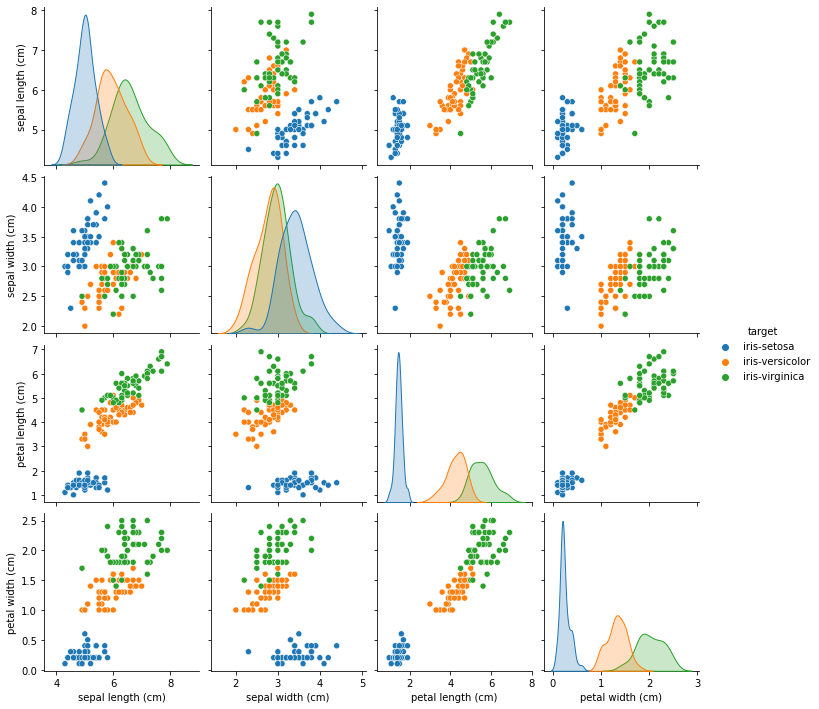

In [57]:
sns.pairplot(data=iris_df,hue='target',diag_kind='kde');   ## One way of visualizing higher dimensions data in 2-D scatter plots

In [58]:
iris_st_df = pd.concat([pd.DataFrame(ss.fit_transform(iris_df.iloc[:,0:4]),columns=iris.feature_names),iris_df['target']],axis=1)

In [59]:
iris_st_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,iris-setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,iris-setosa
2,-1.385353,0.328414,-1.397064,-1.315444,iris-setosa
3,-1.506521,0.098217,-1.283389,-1.315444,iris-setosa
4,-1.021849,1.249201,-1.340227,-1.315444,iris-setosa


##### **Before applying PCA, the first step is to standardized the dataset column-wise with mean as 0 and variance as 1.**

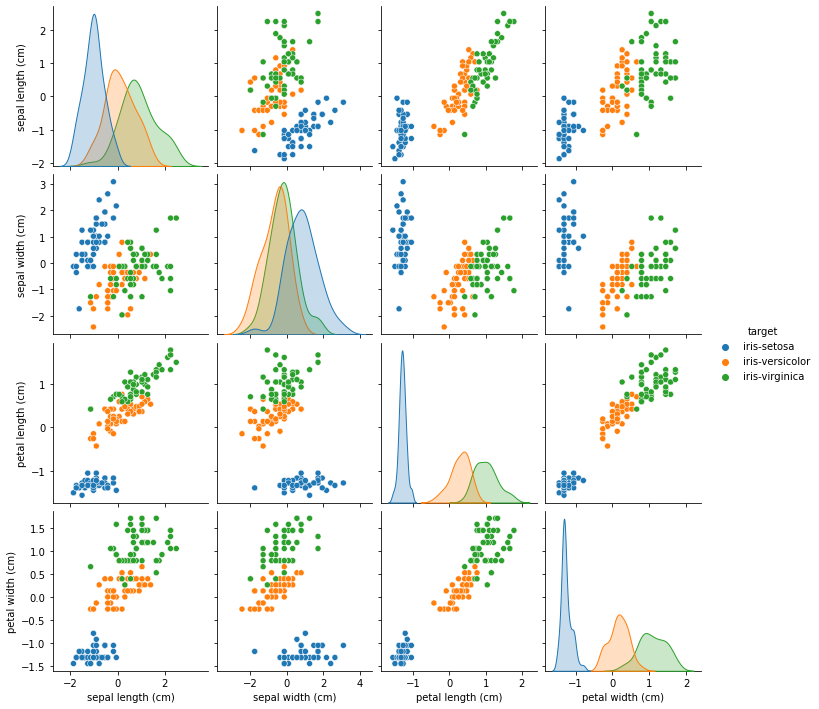

In [60]:
sns.pairplot(data=iris_st_df,hue='target');  ## Standardizing doesn't affect the representation of data points

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca2 = PCA()

In [63]:
pca_comps = pd.DataFrame(pca2.fit_transform(iris_st_df.iloc[:,0:4]),columns=['PC1','PC2','PC3','PC4'])

In [64]:
pca_comps.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


### **Variances of the components**

In [65]:
pca2.explained_variance_      ## Variances of generated components

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [66]:
## ## Manual calculation :: Unbiased variance of components
print(np.var(pca_comps['PC1'],ddof=1),
np.var(pca_comps['PC2'],ddof=1),
np.var(pca_comps['PC3'],ddof=1),
np.var(pca_comps['PC4'],ddof=1),sep='\n')

2.938085050199999
0.9201649041624874
0.14774182104494815
0.020853862176462293


### **Percentage of variations explained by components**

In [67]:
## Percentage of variation explained by every component
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [68]:
## Sum of variances in the features post normalizing
var_sum_feat = np.var(iris_st_df).sum()
var_sum_feat

3.999999999999999

In [69]:
## Manual calculation :: Percentage of variations explained by components
print(np.var(pca_comps['PC1'],ddof=0)/var_sum_feat,
np.var(pca_comps['PC2'],ddof=0)/var_sum_feat,
np.var(pca_comps['PC3'],ddof=0)/var_sum_feat,
np.var(pca_comps['PC4'],ddof=0)/var_sum_feat,sep='\n')

0.7296244541329998
0.2285076178670178
0.03668921889282879
0.005178709107154803


#### **Scree Plot :: Displays the percentage of variation explained by each component**

In [70]:
var_ratio = np.round(pca2.explained_variance_ratio_*100,2)

In [71]:
var_ratio

array([72.96, 22.85,  3.67,  0.52])

In [72]:
var_ratio_labels = ['PC'+str(x) for x in range(1,len(var_ratio)+1)]

In [73]:
var_ratio_labels

['PC1', 'PC2', 'PC3', 'PC4']

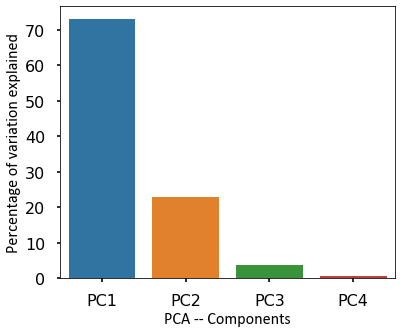

In [74]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(6,5))
    sns.barplot(x=var_ratio_labels,y=var_ratio)
    plt.xlabel('PCA -- Components',fontdict={'size':16,'family':'calibri'})
    plt.ylabel('Percentage of variation explained',fontdict={'size':16,'family':'calibri'})
    plt.show()

##### **I'll go ahead with PC1 and PC2 which covers 95% of the variation so the loss of only 5% information.**

In [75]:
iris_pca_comp = pd.DataFrame(pca2.fit_transform(iris_st_df.iloc[:,0:4]),columns=['Component1','Component2','Component3','Component4'])

In [76]:
iris_pca_comp.head()

,Component1,Component2,Component3,Component4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [77]:
iris_pca_comp.shape

(150, 4)

In [78]:
iris_pca_comp = pd.concat([iris_pca_comp,iris_st_df['target']],axis=1)

In [79]:
iris_pca_comp.head()

,Component1,Component2,Component3,Component4,target
0,-2.264703,0.480027,-0.127706,-0.024168,iris-setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,iris-setosa
2,-2.364229,-0.341908,0.044201,-0.028377,iris-setosa
3,-2.299384,-0.597395,0.091290,0.065956,iris-setosa
4,-2.389842,0.646835,0.015738,0.035923,iris-setosa


#### **Visualizing the dataset using the PCA components**

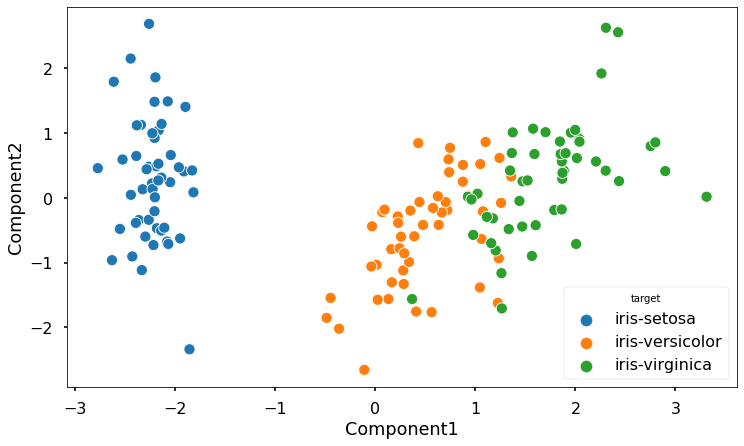

In [80]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='Component1',y='Component2',data=iris_pca_comp,hue='target');

## **`Ways_of_generating_Symmetric_Matrix`**

In [81]:
cov_symm_matrix = pd.DataFrame(np.cov(iris_st_df.iloc[:,0:-1],rowvar=False))

In [82]:
cov_symm_matrix

,0,1,2,3
0,1.006711,-0.118359,0.877604,0.823431
1,-0.118359,1.006711,-0.431316,-0.368583
2,0.877604,-0.431316,1.006711,0.969328
3,0.823431,-0.368583,0.969328,1.006711


##### **COV calculation ways**

##### **Way-1**

In [83]:
np.cov(iris_st_df.iloc[:,0])

array(1.00671141)

##### **Way-2**

In [84]:
np.var(iris_st_df.iloc[:,0],ddof=1)

1.006711409395973

##### **Way-3**

In [85]:
np.dot((iris_st_df.iloc[:,0:-1].T),iris_st_df.iloc[:,0:-1])/(150-1)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

## ***LDA (Linear Discriminant Analysis)***

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [87]:
lda = LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto',n_components=2)

In [88]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [89]:
xx = lda.fit_transform(iris_df.iloc[:,0:4],iris_df.iloc[:,-1])

In [90]:
iris_df.shape, xx.shape

((150, 5), (150, 2))

In [91]:
lda_op = pd.concat([pd.DataFrame(xx),iris_df.iloc[:,-1]],axis=1).rename(columns={0:'Component1',1:'Component2'})
lda_op.head()

,Component1,Component2,target
0,4.952996,3.499573,iris-setosa
1,4.068302,3.064113,iris-setosa
2,4.459593,3.260858,iris-setosa
3,3.854646,2.707845,iris-setosa
4,5.050185,3.491646,iris-setosa


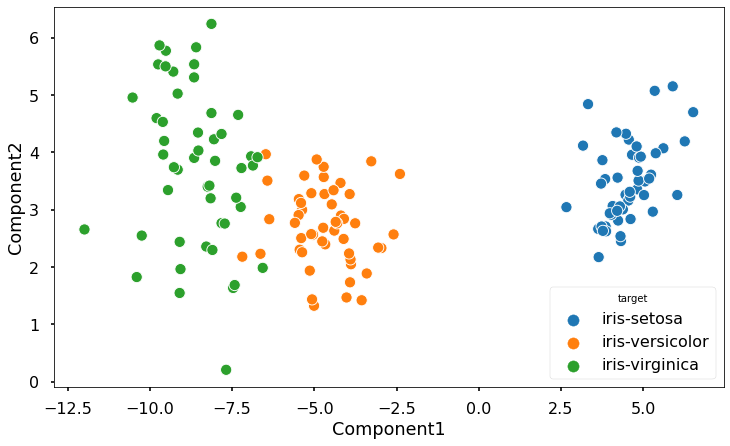

In [92]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='Component1',y='Component2',data=lda_op,hue='target');

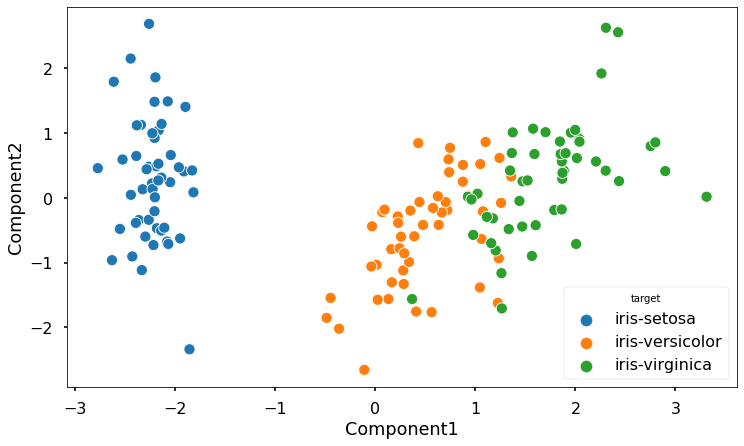

In [93]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='Component1',y='Component2',data=iris_pca_comp,hue='target');

In [94]:
lda.classes_, lda.coef_, lda.covariance_,lda.explained_variance_ratio_,lda.means_

(array(['iris-setosa', 'iris-versicolor', 'iris-virginica'], dtype='<U15'),
 array([[ 20.16207805,  25.87554518, -11.15148795, -17.88698776],
        [ 14.92037214,   9.4866362 ,   7.70061333,   6.76423777],
        [ 12.82417218,   6.18543353,  14.27048671,  21.80739697]]),
 array([[0.259708  , 0.07630637, 0.14451524, 0.03316164],
        [0.07630637, 0.11308   , 0.0478721 , 0.02810179],
        [0.14451524, 0.0478721 , 0.181484  , 0.03726886],
        [0.03316164, 0.02810179, 0.03726886, 0.041044  ]]),
 array([0.97875711, 0.01751255]),
 array([[5.006, 3.428, 1.462, 0.246],
        [5.936, 2.77 , 4.26 , 1.326],
        [6.588, 2.974, 5.552, 2.026]]))

### **Which_technique_is_better_before_applying_PCA?**
##### Standard Scaling or MinMax Scaling or L2 or L1 norm?

https://www.researchgate.net/post/In_which_case_data_need_to_be_normalized_before_PCA_Cluster_analysis
https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling

In [95]:
## Preparaing a toy dataset
A = [100,120,90,140,80,70,75,110,105,125,95,135]
B = [50,49,32,30,40,45,35,28,48,40,38,31]

df = pd.DataFrame(A)
df = pd.concat([df,pd.DataFrame(B)],axis=1)
df.columns = ['A','B']
df

,A,B
0,100,50
1,120,49
2,90,32
3,140,30
4,80,40
5,70,45
6,75,35
7,110,28
8,105,48
9,125,40


In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Instantiating the scalers and normalizers
ss = StandardScaler()
mms = MinMaxScaler()
nrm_l2 = Normalizer(norm='l2')
nrm_l1 = Normalizer(norm='l1')

##### **Standard Scaling**

In [97]:
# Standard Scaling the features
df_ss = pd.DataFrame(ss.fit_transform(df))
df_ss.columns = df.columns
df_ss

,A,B
0,-0.169751,1.492579
1,0.735587,1.358915
2,-0.622420,-0.913369
3,1.640925,-1.180697
4,-1.075089,0.155941
5,-1.527758,0.824260
6,-1.301424,-0.512378
7,0.282918,-1.448024
8,0.056584,1.225251
9,0.961922,0.155941


In [98]:
# Mean of Standard Scaled data
np.round(df_ss['A'].mean(),3), np.round(df_ss['B'].mean(),3)

(0.0, -0.0)

In [99]:
# Variance of Standard Scaled data
df_ss['A'].var(ddof=0), np.round(df_ss['B'].var(ddof=0),3)

(1.0, 1.0)

In [100]:
# Stddev of Standard Scaled data
df_ss['A'].std(ddof=0), np.round(df_ss['B'].std(ddof=0),3)

(1.0, 1.0)

In [101]:
# Magnitude of Features
np.linalg.norm(df_ss['A'],axis=0),np.linalg.norm(df_ss['B'],axis=0)

(3.4641016151377544, 3.4641016151377544)

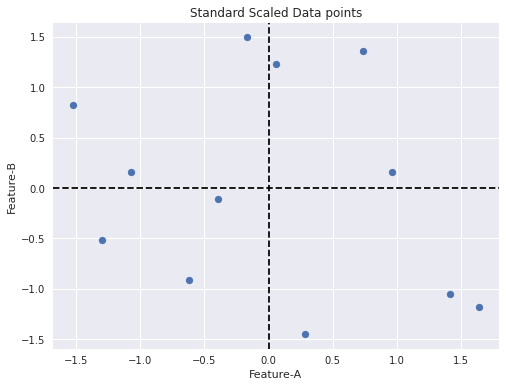

In [102]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    plt.axhline(y=0,color='k',linestyle='--')
    plt.axvline(x=0,color='k',linestyle='--')
    plt.scatter(df_ss['A'],df_ss['B'])
    plt.xlabel("Feature-A")
    plt.ylabel("Feature-B")
    plt.title("Standard Scaled Data points")

##### **MinMax Scaling**

In [103]:
# MinMax Features Scaling
df_mms = pd.DataFrame(mms.fit_transform(df))
df_mms.columns = df.columns
df_mms

,A,B
0,0.428571,1.000000
1,0.714286,0.954545
2,0.285714,0.181818
3,1.000000,0.090909
4,0.142857,0.545455
5,0.000000,0.772727
6,0.071429,0.318182
7,0.571429,0.000000
8,0.500000,0.909091
9,0.785714,0.545455


In [104]:
# Mean after MinMax Scaled features
df_mms['A'].mean(), np.round(df_mms['B'].mean(),3)

(0.48214285714285704, 0.492)

In [105]:
# Variance after MinMax Scaled features
df_mms['A'].var(ddof=0), np.round(df_mms['B'].var(ddof=0),3)

(0.09959608843537417, 0.116)

In [106]:
# Stddev after MinMax Scaled features
df_mms['A'].std(ddof=0), np.round(df_mms['B'].std(ddof=0),3)

(0.31558847956694197, 0.34)

In [107]:
# Magnitude of MinMax Scaled features
np.linalg.norm(df_mms['A']),np.linalg.norm(df_mms['B'])

(1.99616980178316, 2.0730462274529784)

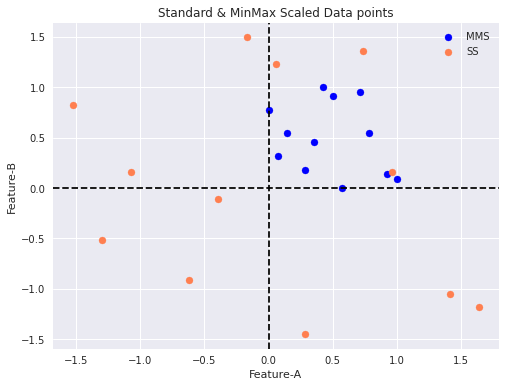

In [108]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    plt.axhline(y=0,color='k',linestyle='--')
    plt.axvline(x=0,color='k',linestyle='--')
    plt.scatter(df_mms['A'],df_mms['B'],color='blue',label='MMS')
    plt.scatter(df_ss['A'],df_ss['B'],color='coral',label='SS')
    plt.xlabel("Feature-A")
    plt.ylabel("Feature-B")
    plt.title("Standard & MinMax Scaled Data points")
    plt.legend()

##### **L2-Row Normalization**

In [109]:
df

,A,B
0,100,50
1,120,49
2,90,32
3,140,30
4,80,40
5,70,45
6,75,35
7,110,28
8,105,48
9,125,40


##### **How Row-Norm works?**
\begin{align}
L_{2} = x_{ij} \div \sqrt{x_{i1}^2 + x_{i2}^2 + .... + x_{im}^2}
\end{align}

In [110]:
# L2 norm via Normalizer
nrm_l2.fit_transform([df.iloc[0,:]])

array([[0.89442719, 0.4472136 ]])

In [111]:
# L2 norm manually
df.iloc[0,:]/np.sqrt(np.square(df.iloc[0,0]) + np.square(df.iloc[0,1]))

A    0.894427
B    0.447214
Name: 0, dtype: float64

In [112]:
# Transforming Rows via L2-Normalizer
df_nrm_l2 = pd.DataFrame(nrm_l2.fit_transform(df))
df_nrm_l2.columns = df.columns
df_nrm_l2

,A,B
0,0.894427,0.447214
1,0.925793,0.378032
2,0.942215,0.335010
3,0.977802,0.209529
4,0.894427,0.447214
5,0.841178,0.540758
6,0.906183,0.422885
7,0.969097,0.246679
8,0.909474,0.415760
9,0.952424,0.304776


In [113]:
# Features Mean after L2-norm
df_nrm_l2['A'].mean(), np.round(df_nrm_l2['B'].mean(),3)

(0.9263443429596032, 0.362)

In [114]:
# Features Variance after L2-norm
df_nrm_l2['A'].var(ddof=0), np.round(df_nrm_l2['B'].var(ddof=0),3)

(0.0014771835693296145, 0.009)

In [115]:
# Features Stddev after L2-norm
df_nrm_l2['A'].std(ddof=0), np.round(df_nrm_l2['B'].std(ddof=0),3)

(0.0384341458774566, 0.097)

In [116]:
# Magnitude of Rows after L2-Norm
np.linalg.norm(df_nrm_l2,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

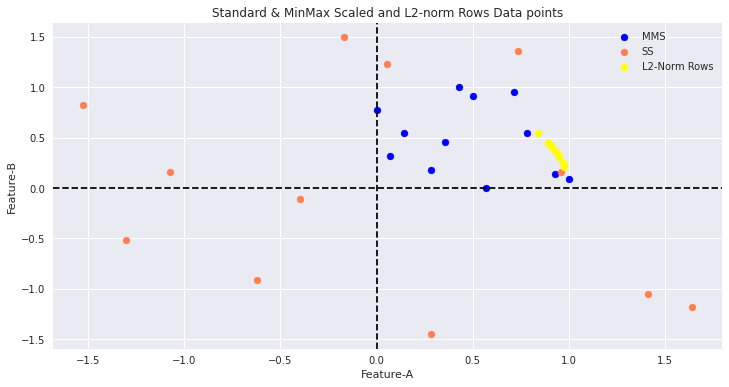

In [117]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    plt.axhline(y=0,color='k',linestyle='--')
    plt.axvline(x=0,color='k',linestyle='--')
    plt.scatter(df_mms['A'],df_mms['B'],color='blue',label='MMS')
    plt.scatter(df_ss['A'],df_ss['B'],color='coral',label='SS')
    plt.scatter(df_nrm_l2['A'],df_nrm_l2['B'],color='yellow',label='L2-Norm Rows')
    plt.xlabel("Feature-A")
    plt.ylabel("Feature-B")
    plt.title("Standard & MinMax Scaled and L2-norm Rows Data points")
    plt.legend()

##### **L1-Row Normalization**

##### **How L1-norm works?**

\begin{align}
L_{1} = x_{ij} \div (|x_{i1}| + |x_{i2}| + .... + |x_{im}|)
\end{align}

In [118]:
# Transforming dataset rows via L1-norm
df_nrm_l1 = pd.DataFrame(nrm_l1.fit_transform(df))
df_nrm_l1.columns = df.columns
df_nrm_l1

,A,B
0,0.666667,0.333333
1,0.710059,0.289941
2,0.737705,0.262295
3,0.823529,0.176471
4,0.666667,0.333333
5,0.608696,0.391304
6,0.681818,0.318182
7,0.797101,0.202899
8,0.686275,0.313725
9,0.757576,0.242424


In [119]:
# Features Mean after L1-norm
df_nrm_l1['A'].mean(), np.round(df_nrm_l1['B'].mean(),3)

(0.7219692593091253, 0.278)

In [120]:
# Features Variance after L2-norm
df_nrm_l1['A'].var(ddof=0), np.round(df_nrm_l1['B'].var(ddof=0),3)

(0.00398685354358775, 0.004)

In [121]:
# Features Stddev after L2-norm
df_nrm_l1['A'].std(ddof=0), np.round(df_nrm_l1['B'].std(ddof=0),3)

(0.06314153580320762, 0.063)

In [122]:
# Dataset rows magnitude after L1-norm
np.linalg.norm(df_nrm_l1,axis=1)

array([0.74535599, 0.76697439, 0.7829478 , 0.84222477, 0.74535599,
       0.72362248, 0.75240661, 0.82251963, 0.75458358, 0.79541847,
       0.76930926, 0.8344189 ])

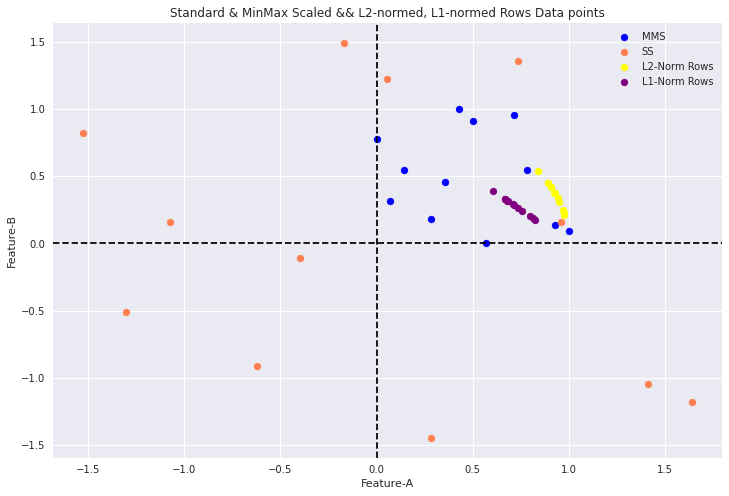

In [123]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,8))
    plt.axhline(y=0,color='k',linestyle='--')
    plt.axvline(x=0,color='k',linestyle='--')
    plt.scatter(df_mms['A'],df_mms['B'],color='blue',label='MMS')
    plt.scatter(df_ss['A'],df_ss['B'],color='coral',label='SS')
    plt.scatter(df_nrm_l2['A'],df_nrm_l2['B'],color='yellow',label='L2-Norm Rows')
    plt.scatter(df_nrm_l1['A'],df_nrm_l1['B'],color='purple',label='L1-Norm Rows')
    plt.xlabel("Feature-A")
    plt.ylabel("Feature-B")
    plt.title("Standard & MinMax Scaled && L2-normed, L1-normed Rows Data points")
    plt.legend()

#### The above graph clearly shows us that MMS, L2-norm and L1-norm are not suitable for PCA. Because, PCA looks for maximum variation in the features or try to come up with a new axis that captures the maximum variation of data.
- MMS data values are bucketed in [0,1] range
- L2 and L1 norm data points are close to 0 and tightly packed
    - And, L1 norm values are more pulled towards 0

#### **Effect of Mean Centering the features on COV**

In [124]:
# Mean of features after SS, MMS, L2-norm and L1-norm
print(df_ss['A'].var(ddof=0), np.round(df_ss['B'].var(ddof=0),3))
print(df_mms['A'].var(ddof=0), np.round(df_mms['B'].var(ddof=0),3))
print(df_nrm_l2['A'].var(ddof=0), np.round(df_nrm_l2['B'].var(ddof=0),3))
print(df_nrm_l1['A'].var(ddof=0), np.round(df_nrm_l1['B'].var(ddof=0),3))

1.0 1.0
0.09959608843537417 0.116
0.0014771835693296145 0.009
0.00398685354358775 0.004


#### So, clearly we are witnessing the downward trend in the means of features after MMS, L2-norm and L1-norm as compared to SS. One more thing to point out here is that L1-norm further reduces the mean close to 0 which is true because L1-norm makes the non-important feature to 0.

In [125]:
# COV on raw dataset
np.cov(df,rowvar=False,bias=False)

array([[532.38636364, -45.22727273],
       [-45.22727273,  61.06060606]])

In [126]:
# Bringing Features Mean to 0
df_mean_centric = pd.DataFrame(df['A']-df['A'].mean(),columns=['A'])
df_mean_centric = pd.concat([df_mean_centric,pd.DataFrame(df['B']-df['B'].mean(),columns=['B'])],axis=1)
df_mean_centric

,A,B
0,-3.75,11.166667
1,16.25,10.166667
2,-13.75,-6.833333
3,36.25,-8.833333
4,-23.75,1.166667
5,-33.75,6.166667
6,-28.75,-3.833333
7,6.25,-10.833333
8,1.25,9.166667
9,21.25,1.166667


In [127]:
# No effect of Mean Centering on COV
np.cov(df_mean_centric,rowvar=False,bias=False)

array([[532.38636364, -45.22727273],
       [-45.22727273,  61.06060606]])

##### **Effect of mean centring of one feature on COV?**

In [128]:
# Bringing mean of only 1 feature to 0
df_mean_centric_one_col = pd.DataFrame(df['A']-df['A'].mean(),columns=['A'])
df_mean_centric_one_col = pd.concat([df_mean_centric_one_col,df['B']],axis=1)
df_mean_centric_one_col

,A,B
0,-3.75,50
1,16.25,49
2,-13.75,32
3,36.25,30
4,-23.75,40
5,-33.75,45
6,-28.75,35
7,6.25,28
8,1.25,48
9,21.25,40


In [129]:
# No effect of Mean Centering of one feature on COV
np.cov(df_mean_centric_one_col,rowvar=False,bias=False)

array([[532.38636364, -45.22727273],
       [-45.22727273,  61.06060606]])

##### **Effect Upscaling or Downscaling of a feature on COV?**

In [130]:
df_mean_scl_col = pd.DataFrame(df['A']*2,columns=['A'])
df_mean_scl_col = pd.concat([df_mean_scl_col,df['B']],axis=1)
df_mean_scl_col

,A,B
0,200,50
1,240,49
2,180,32
3,280,30
4,160,40
5,140,45
6,150,35
7,220,28
8,210,48
9,250,40


In [131]:
# COV on Raw Data
np.cov(df,rowvar=False,bias=False)

array([[532.38636364, -45.22727273],
       [-45.22727273,  61.06060606]])

In [132]:
# COV on one feature upscaled data
np.cov(df_mean_scl_col,rowvar=False,bias=False)

array([[2129.54545455,  -90.45454545],
       [ -90.45454545,   61.06060606]])

In [133]:
# The upscaled factor is in product with COV of raw data
np.cov(df_mean_scl_col,rowvar=False,bias=False)[0][1]/2

-45.227272727272734

##### **Overall, visualization of all the SS, MMS, L2-norm and L1-norm on dataset**

In [134]:
df_all = pd.concat([df_ss,df_mms,df_nrm_l2,df_nrm_l1],axis=1)
df_all.columns = ['A_ss','B_ss','A_mms','B_mms','A_nrm_l2','B_nrm_l2','A_nrm_l1','B_nrm_l1']
df_all

,A_ss,B_ss,A_mms,B_mms,A_nrm_l2,B_nrm_l2,A_nrm_l1,B_nrm_l1
0,-0.169751,1.492579,0.428571,1.000000,0.894427,0.447214,0.666667,0.333333
1,0.735587,1.358915,0.714286,0.954545,0.925793,0.378032,0.710059,0.289941
2,-0.622420,-0.913369,0.285714,0.181818,0.942215,0.335010,0.737705,0.262295
3,1.640925,-1.180697,1.000000,0.090909,0.977802,0.209529,0.823529,0.176471
4,-1.075089,0.155941,0.142857,0.545455,0.894427,0.447214,0.666667,0.333333
5,-1.527758,0.824260,0.000000,0.772727,0.841178,0.540758,0.608696,0.391304
6,-1.301424,-0.512378,0.071429,0.318182,0.906183,0.422885,0.681818,0.318182
7,0.282918,-1.448024,0.571429,0.000000,0.969097,0.246679,0.797101,0.202899
8,0.056584,1.225251,0.500000,0.909091,0.909474,0.415760,0.686275,0.313725
9,0.961922,0.155941,0.785714,0.545455,0.952424,0.304776,0.757576,0.242424


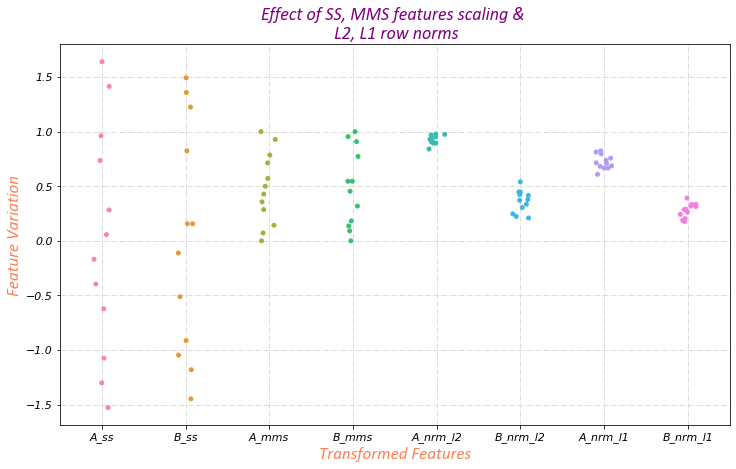

In [135]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(12,7))
    sns.stripplot(data=df_all)
    plt.grid(which='major',linestyle='-.',color='lightgray')
    plt.title("Effect of SS, MMS features scaling & \n L2, L1 row norms",
              fontdict={'family':'calibri','size':18,'color':'purple','style':'oblique'})
    plt.xticks(size=11,style='oblique',color='k')
    plt.xlabel("Transformed Features",fontdict={'family':'calibri','size':17,'color':'coral','style':'oblique'})
    plt.yticks(size=11,style='oblique',color='k')
    plt.ylabel("Feature Variation",fontdict={'family':'calibri','size':17,'color':'coral','style':'oblique'})

#### The above plot shows us the effects of all the applied techniques on the variance of dataset features. SS is the best choice before applying PCA and if closely observe L2 and L1 features then we can say that L1-norm has pulled the features more close to 0.

##### **Effects of SS, MMS, L2-norm and L1-norm on COV**

In [136]:
np.cov(df_ss,rowvar=False,bias=False)

array([[ 1.09090909, -0.27364968],
       [-0.27364968,  1.09090909]])

In [137]:
np.cov(df_mms,rowvar=False,bias=False)

array([[ 0.10865028, -0.02936836],
       [-0.02936836,  0.12615828]])

In [138]:
np.cov(df_nrm_l2,rowvar=False,bias=False)

array([[ 0.00161147, -0.00401429],
       [-0.00401429,  0.01027877]])

In [139]:
np.cov(df_nrm_l1,rowvar=False,bias=False)

array([[ 0.00434929, -0.00434929],
       [-0.00434929,  0.00434929]])